In [1]:
!pip install signed_backbones

You should consider upgrading via the 'c:\users\furkan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import signed_backbones as sb


Iterative fitting procedure converged at iteration 6.
2550 edges are retained.
Iterative fitting procedure converged at iteration 6.
508 edges are retained.


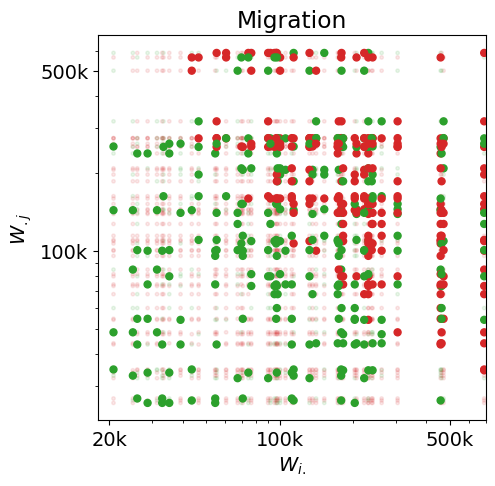

In [3]:
graph = pd.read_csv('usmigration2018.csv', header=None)

edges = graph.copy()


outstrength = graph.groupby(by=0).sum().reset_index()
instrength = graph.groupby(by=1).sum().reset_index()

instrength.columns = ['node', 'strength']
outstrength.columns = ['node', 'strength']

plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(5, 5))
# plt.box(False)

plt.title('Migration')
plt.xlabel('$W_{i.}$')
plt.ylabel('$W_{.j}$')

plt.xscale('log')
plt.yscale('log')

plt.xlim((18000, 700000))
plt.xlim((18000, 700000))
plt.xticks(ticks =[20000,  100000,  500000 ],  labels = ['20k',  '100k', '500k'])
plt.yticks(ticks =[20000,  100000,  500000 ],  labels = ['20k',  '100k', '500k'])
# plt.yticks(ticks =[1, 2, 3, 4],  labels = ['5%','10%', '25%', '100%'], rotation= 0)
# plt.tick_params(axis='y', left=False, grid_alpha = 0.25)
# plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
# plt.minorticks_off()


backbone = pd.DataFrame(sb.extract(graph, significance_threshold = 0, vigor_threshold = 0, return_weights=True))
a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = [0,1], right_on = [0,1], how = 'left').fillna(0)
a = pd.merge(backbone, outstrength, left_on = 0, right_on='node', how='left')
a = pd.merge(a, instrength, left_on = 1, right_on='node', how='left')
plt.scatter(a.strength_x, a.strength_y, c=np.sign(a[2]).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 0.1, s = 25, marker = '.')

backbone = pd.DataFrame(sb.extract(graph, significance_threshold = (-40, 40), vigor_threshold = (-0.25, 0.25), return_weights=True))
a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = [0,1], right_on = [0,1], how = 'left').fillna(0)
a = pd.merge(backbone, outstrength, left_on = 0, right_on='node', how='left')
a = pd.merge(a, instrength, left_on = 1, right_on='node', how='left')
plt.scatter(a.strength_x, a.strength_y, c=np.sign(a[2]).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 1, s = 25, marker = 'o')


Iterative fitting procedure converged at iteration 3.
650 edges are retained.
Iterative fitting procedure converged at iteration 3.
132 edges are retained.


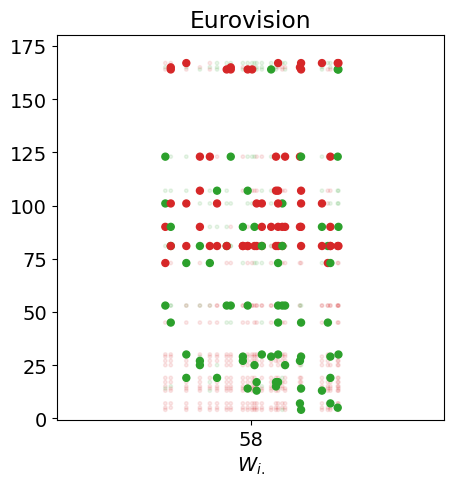

In [4]:
graph = pd.read_csv('eurovision2003.csv', header=None)

edges = graph.copy()


outstrength = graph.groupby(by=0).sum().reset_index()
instrength = graph.groupby(by=1).sum().reset_index()

instrength.columns = ['node', 'strength']
outstrength.columns = ['node', 'strength']

outstrength['strength'] = outstrength['strength'] + np.random.rand(len(outstrength)) - 0.5

plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(5, 5))
# plt.box(False)

plt.title('Eurovision')
plt.xlabel('$W_{i.}$')
# plt.ylabel('$W_{.j}$')

# plt.xscale('log')
# plt.yscale('log')

plt.xlim((57, 59))
plt.ylim((-1, 180))
plt.xticks(ticks = [58])#,  labels = ['0', '$10^1$', '$10^2$', '$10^3$', '$10^4$','$10^5$'])
# plt.yticks(ticks =[1, 2, 3, 4],  labels = ['5%','10%', '25%', '100%'], rotation= 0)
# plt.tick_params(axis='y', left=False, grid_alpha = 0.25)
# plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
# plt.minorticks_off()


backbone = pd.DataFrame(sb.extract(graph, significance_threshold = 0, vigor_threshold = 0, return_weights=True))
a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = [0,1], right_on = [0,1], how = 'left').fillna(0)
a = pd.merge(backbone, outstrength, left_on = 0, right_on='node', how='left')
a = pd.merge(a, instrength, left_on = 1, right_on='node', how='left')
plt.scatter(a.strength_x, a.strength_y, c=np.sign(a[2]).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 0.1, s = 25, marker = '.')

backbone = pd.DataFrame(sb.extract(graph, significance_threshold = (-1.8, 2.4), vigor_threshold =  (-0.5, 0.3), return_weights=True))
a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = [0,1], right_on = [0,1], how = 'left').fillna(0)
a = pd.merge(backbone, outstrength, left_on = 0, right_on='node', how='left')
a = pd.merge(a, instrength, left_on = 1, right_on='node', how='left')
plt.scatter(a.strength_x, a.strength_y, c=np.sign(a[2]).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 1, s = 25, marker = 'o')


Iterative fitting procedure converged at iteration 3.
6328 edges are retained.
Iterative fitting procedure converged at iteration 3.
1272 edges are retained.


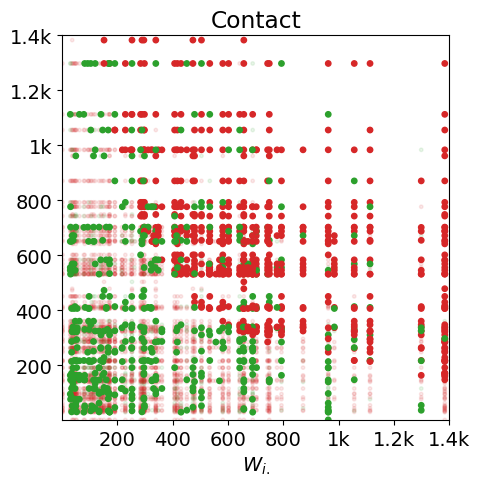

In [5]:
graph = pd.read_csv('hypertext2009.csv', header=None)

edges = graph.copy()
edges.loc[:,'pair'] = edges.iloc[:,[0,1]].apply(frozenset, axis=1)
edges = edges.loc[:, ['pair', 2]]
edges.columns = ['pair', 'weight']

strength = pd.DataFrame(np.concatenate([graph.values, graph.iloc[:, [1,0,2]].values]))[[0,2]].groupby(by=0).sum().reset_index()
strength.columns = ['node', 'strength']
strength.head()

plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(5, 5))
# plt.box(False)

plt.title('Contact')
plt.xlabel('$W_{i.}$')
# plt.ylabel('$W_{.j}$')

# plt.xscale('log')
# plt.yscale('log')

plt.xlim((0, 1400))
plt.ylim((0, 1400))
plt.xticks(ticks =[200, 400, 600, 800, 1000, 1200, 1400],  labels = [200, 400, 600, 800, '1k', '1.2k', '1.4k'])
plt.yticks(ticks =[200, 400, 600, 800, 1000, 1200, 1400],  labels = [200, 400, 600, 800, '1k', '1.2k', '1.4k'])
# plt.yticks(ticks =[1, 2, 3, 4],  labels = ['5%','10%', '25%', '100%'], rotation= 0)
# plt.tick_params(axis='y', left=False, grid_alpha = 0.25)
# plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
# plt.minorticks_off()

backbone = pd.DataFrame(sb.extract(graph, significance_threshold = 0, vigor_threshold = 0, return_weights=True, directed = False))
backbone.loc[:,'pair'] = backbone.iloc[:,[0,1]].apply(frozenset, axis=1)
backbone = backbone.loc[:, ['pair', 2]]
backbone.columns = ['pair', 'weight']

a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = 'pair', right_on = 'pair', how = 'left').fillna(0)
a = pd.concat([a, pd.DataFrame(list(a.pair), columns=['v1', 'v2'])], axis = 1)
idx = a.v1 > a.v2 #this line and the following are ensuring that frozenset that is used for undirected networks do not select v1 and v2 (i.e., Wi. and W.j in the figure) randomly within a pair. so that the figure is reproducible.
a.loc[idx, ['v1','v2']] = a.loc[idx,['v2','v1']].values
a = pd.merge(a, strength, left_on = 'v1', right_on='node', how='left')
a = pd.merge(a, strength, left_on = 'v2', right_on='node', how='left')
plt.scatter(a.strength_x, a.strength_y, c=np.sign(a['weight_x']).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 0.1, s = 25, marker = '.')

backbone = pd.DataFrame(sb.extract(graph, significance_threshold = (-2.25, 2.25), vigor_threshold = (-0.25, 0.25), return_weights=True, directed = False))
backbone.loc[:,'pair'] = backbone.iloc[:,[0,1]].apply(frozenset, axis=1)
backbone = backbone.loc[:, ['pair', 2]]
backbone.columns = ['pair', 'weight']

a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = 'pair', right_on = 'pair', how = 'left').fillna(0)
a = pd.concat([a, pd.DataFrame(list(a.pair), columns=['v1', 'v2'])], axis = 1)
idx = a.v1 > a.v2 #this line and the following are ensuring that frozenset that is used for undirected networks do not select v1 and v2 (i.e., Wi. and W.j in the figure) randomly within a pair. so that the figure is reproducible.
a.loc[idx, ['v1','v2']] = a.loc[idx,['v2','v1']].values
a = pd.merge(a, strength, left_on = 'v1', right_on='node', how='left')
a = pd.merge(a, strength, left_on = 'v2', right_on='node', how='left')
plt.scatter(a.strength_x, a.strength_y, c=np.sign(a['weight_x']).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 1, s = 15, marker = 'o')


Iterative fitting procedure converged at iteration 3.
1891 edges are retained.
Iterative fitting procedure converged at iteration 3.
387 edges are retained.


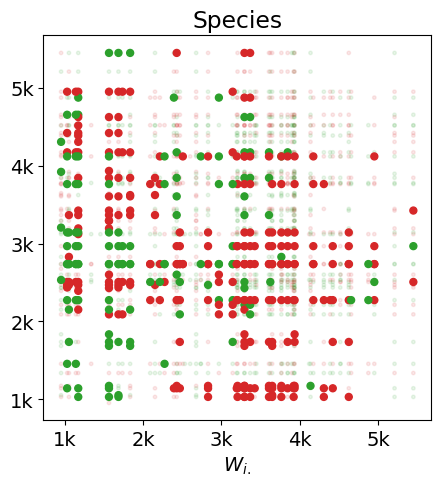

In [6]:
graph = pd.read_csv('species.csv', header=None)
edges = graph.copy()
edges.loc[:,'pair'] = edges.iloc[:,[0,1]].apply(frozenset, axis=1)
edges = edges.loc[:, ['pair', 2]]
edges.columns = ['pair', 'weight']

strength = pd.DataFrame(np.concatenate([graph.values, graph.iloc[:, [1,0,2]].values]))[[0,2]].groupby(by=0).sum().reset_index()
strength.columns = ['node', 'strength']
strength.head()

plt.style.use('default') 
font = {'size'   : 14}
plt.rc('font', **font)
plt.figure(figsize=(5, 5))
# plt.box(False)

plt.title('Species')
plt.xlabel('$W_{i.}$')
# plt.ylabel('$W_{.j}$')

# plt.xscale('log')
# plt.xlim((-2, 1500))
# plt.ylim((0.5, 4.5))
plt.xticks(ticks =[1000, 2000, 3000, 4000, 5000, 6000],  labels = ['1k', '2k', '3k', '4k', '5k', '6k'])
plt.yticks(ticks =[1000, 2000, 3000, 4000, 5000, 6000],  labels = ['1k', '2k', '3k', '4k', '5k', '6k'])

# plt.yticks(ticks =[1, 2, 3, 4],  labels = ['5%','10%', '25%', '100%'], rotation= 0)
# plt.tick_params(axis='y', left=False, grid_alpha = 0.25)
# plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
# plt.minorticks_off()



backbone = pd.DataFrame(sb.extract(graph, significance_threshold = 0, vigor_threshold = 0, return_weights=True, directed = False))
backbone.loc[:,'pair'] = backbone.iloc[:,[0,1]].apply(frozenset, axis=1)
backbone = backbone.loc[:, ['pair', 2]]
backbone.columns = ['pair', 'weight']

a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = 'pair', right_on = 'pair', how = 'left').fillna(0)
a = pd.concat([a, pd.DataFrame(list(a.pair), columns=['v1', 'v2'])], axis = 1)
idx = a.v1 > a.v2 #this line and the following are ensuring that frozenset that is used for undirected networks do not select v1 and v2 (i.e., Wi. and W.j in the figure) randomly within a pair. so that the figure is reproducible.
a.loc[idx, ['v1','v2']] = a.loc[idx,['v2','v1']].values
a = pd.merge(a, strength, left_on = 'v1', right_on='node', how='left')
a = pd.merge(a, strength, left_on = 'v2', right_on='node', how='left')
plt.scatter(a.strength_x, a.strength_y, c=np.sign(a['weight_x']).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 0.1, s = 25, marker = '.')


backbone = pd.DataFrame(sb.extract(graph, significance_threshold = (-3.6, 3.6), vigor_threshold = (-0.25, 0.25), return_weights=True, directed = False))
backbone.loc[:,'pair'] = backbone.iloc[:,[0,1]].apply(frozenset, axis=1)
backbone = backbone.loc[:, ['pair', 2]]
backbone.columns = ['pair', 'weight']

a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = 'pair', right_on = 'pair', how = 'left').fillna(0)
a = pd.concat([a, pd.DataFrame(list(a.pair), columns=['v1', 'v2'])], axis = 1)
idx = a.v1 > a.v2 #this line and the following are ensuring that frozenset that is used for undirected networks do not select v1 and v2 (i.e., Wi. and W.j in the figure) randomly within a pair. so that the figure is reproducible.
a.loc[idx, ['v1','v2']] = a.loc[idx,['v2','v1']].values
a = pd.merge(a, strength, left_on = 'v1', right_on='node', how='left')
a = pd.merge(a, strength, left_on = 'v2', right_on='node', how='left')
plt.scatter(a.strength_x, a.strength_y, c=np.sign(a['weight_x']).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 1, s = 25, marker = 'o')

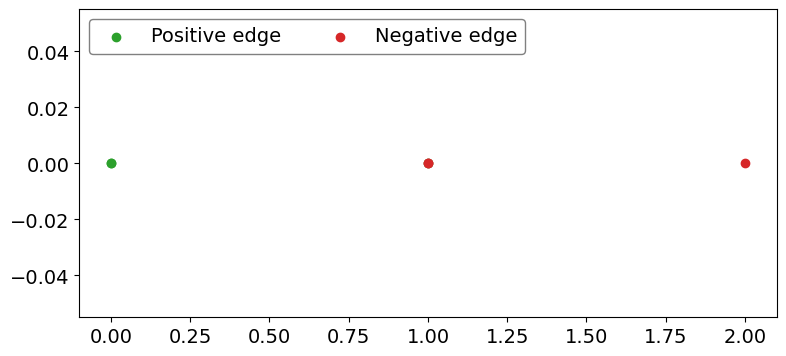

In [7]:
#this figure is created arbitrarily. only to produce figure/image of the legend.
plt.figure(figsize=(9, 4))
plt.scatter([1, 0, 0], [0, 0, 0], label='Positive edge', color = 'tab:green', marker = 'o')
plt.scatter([1, 2, 1], [0, 0, 0],  label='Negative edge', color = 'tab:red', marker = 'o')
plt.legend(loc = 2, ncol = 2, framealpha = 1, edgecolor = 'gray', fancybox = True)